## Computer Vision: building a CNN in Pytorch for image classification
In this tutorial we will use the Python Pytorch library to build a Convolutional Neural Network model and train it to recognize pictures of different objects.

First, we import the necessary libraries and the dataset.

The CIFAR10 dataset is one of the most famous and commonly used Computer Vision benchmark data sets - you would find it used in most Computer Vision publications.

In [39]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torch.optim as optim

In [40]:

get_ipython().run_line_magic('matplotlib', 'inline')
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

class data_loader:
    
    def load_data():

        transform = transforms.Compose(
            [transforms.ToTensor(),
             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

        batch_size = 4

        trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                                download=True, transform=transform)
        trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                                  shuffle=True, num_workers=2)

        testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                               download=True, transform=transform)
        testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                                 shuffle=False, num_workers=2)

        classes = ('plane', 'car', 'bird', 'cat',
                   'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

        # functions to show an image


        def imshow(img):
            img = img / 2 + 0.5     # unnormalize
            npimg = img.numpy()
            plt.imshow(np.transpose(npimg, (1, 2, 0)))
            plt.show()


        # get some random training images
        dataiter = iter(trainloader)
        images, labels = dataiter.next()

        # show images
        imshow(torchvision.utils.make_grid(images))
        print(images.size())
        # print labels
        print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))


        return trainset, testset, trainloader, testloader

For data import we already defined a new class and function to make it more straightforward. You are welcome to have a look at the ````data_loader.py```` file to understand how the dataset is loaded.

Files already downloaded and verified
Files already downloaded and verified


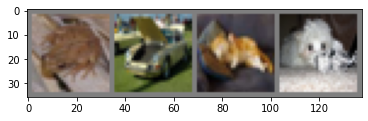

torch.Size([4, 3, 32, 32])
 frog   car   cat   dog


In [41]:
trainset, testset, trainloader, testloader = data_loader.load_data()

Let us show some of the training images, for fun.



## Q1 Building your model architecture
Now, time to get to modeling work!

Let's construct a CNN model with all diffrent layers we learned about.

Your model should contain:
* convolutional layers. You can automatically define them by using the ````Conv2d```` function from ````torch.nn```` library.
* pooling layers. You can automatically define them by using the ````MaxPool2d```` function from ````torch.nn```` library.
* fully-connected layers. You can automatically define them by using the ````Linear```` function from ````torch.nn```` library.

*HINT:* Be careful with sizes of different layers in your network, as well as sizes of convolutional kernels etc.
*HINT 2:* Don't forget to define a ````forward```` function as part of your model class to tell the model how to process inputs (data).

In [46]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(3,15,3,stride=1)
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(15,75,3,stride=1)
        self.linear_layer=nn.Linear(4800,2400)
        self.relu=nn.ReLU()
        self.linear2=nn.Linear(2400,1200)

    def forward(self,x):
        x=self.conv1(x)
        x=self.relu(x)
        x=self.pool(x)
        x=self.conv2(x)
        x=self.relu(x)
        x=self.pool(x)
        x=x.reshape((len(x),-1))
        x=self.linear(x)
        x=self.relu(x)
        x=self.linear2(x)
        x=F.log_softmax(x)
        return x


In [47]:
net=Net()

## Q2 Loss and Optimizer
Define a loss function and an optimizer.

* The loss function you can assume to be the *CrossEntropyLoss* that comes from the ````torch.nn```` library.
* The optimizer you can assume to be the Stochastic Gradient Descent (*SGD*) that comes from the ````torch.optim```` library.

In [48]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

## Q3 Training your model
Train your network!

Don't forget to
* use a loop: you need to train your model "stpe by step"
* at each step, keep track of the value of your loss (*is my model actually training?*)
* at each step, keep track of the value of your accuracy (*is my model getting closer and closer to perfection?*)
* kill gradients at the beginning of your loop with ````zero_grad()```` function applied to your **optimizer**
* apply the backward step (````backward()```` function applied to your **loss**) at the end of your loop, to update parameters and keep the model training
* apply ````step()```` to your **optimizer** after the backward step to finish the training loop

In [49]:
max_epoch = 200

for epoch in range(max_epoch):  # loop over the dataset multiple times

    running_loss = 0.0

    ## note how this for loop is formulated
    ## we iterate over enumerated ````trainloader````: trainloder is an example of a dataloader. Dataloaders (1) shuffle your data set, (2) sample from your dataset (training happens in batches)
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        optimizer.zero_grad()
        output=net.forward(trainloader)
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        model.score(trainloader,labels)
        #print every 2000 mini-batches
        print('Epoch: {} - Loss: {:.6f}'.format(epoch, loss))
            

print('Finished Training')

TypeError: conv2d() received an invalid combination of arguments - got (DataLoader, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!DataLoader!, !Parameter!, !Parameter!, !tuple!, !tuple!, !tuple!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!DataLoader!, !Parameter!, !Parameter!, !tuple!, !tuple!, !tuple!, int)


### Q4 Visualizing training accuracy and training loss

Use the data you stored during training: **training accuracy** and **training loss** and plot them using ````pyplot````.

In [ ]:
...

### Saving your model
Training a depe learning model can be a lot of work, and it can sometimes take hours! To make your model useful and let you re-use the trained model in the future, you can save it down using the code below.

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

## Q5 Testing your model
Let's test how well our model is doing after training 

In [ ]:
outputs = 

In [ ]:
correct = 0
total = 0
net.eval()


In [ ]:
for data in testloader:
    

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))